In [1]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from cv2 import cv2
import matplotlib.pyplot as plt
# import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# LINK FILE RAR
### https://drive.google.com/file/d/14foKHcQzNi71qr3-q_hWuZQZnUjF2Fr-/view?usp=sharing

In [2]:
val_path="C:/Users/asus/Documents/Downloads/deteksi sayuran/validation"
train_path="C:/Users/asus/Documents/Downloads/deteksi sayuran/train"

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                               seed=2509,
                                                               image_size=(224, 224),
                                                              batch_size=32)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(val_path,
                                                              seed=2509,
                                                              image_size=(224, 224),
                                                              shuffle=False,
                                                              batch_size=32)

Found 2585 files belonging to 26 classes.
Found 254 files belonging to 26 classes.


**Pertama kali yang harus dilakukan adalah** 
1. membuat variabel dimana berisikan folder dari data validasi dan training, lalu ditampilkan dengan menggunakan library tensorflow(tf), berhubung gambar pada setiap file memiliki ukuran yang berbeda-beda maka akan dilakukan resize image dengan ukuran 224x224 dan batch size 32.

In [3]:
class_names = train_dataset.class_names
print(len(class_names))

26


**lalu kita cek banyak data label yang kita gunakan**

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(class_names),activation='softmax'))

**proses konvolusi**
>disini akan dilakukan proses konvolusi dengan model sequential, dengan kernel size 3,3. kernel disini merupakan sebuah matriks dengan ukuran 3x3 dengan fungsi aktivasi reLU, dan input shapenya sebesar hasil resize yang sudah dibuat dengan 3 chanel. 3 chanel ini merupakan Red, Green dan Blue

>setelah itu dilakukan maxPooling dengan size 2,2 proses ini dilakukan untuk mengambil nilai maksimal dari matriks

>lalu dilakukan batchnormalization dan melakukan proses konvolusi hingga 5kali

>melakukan dropout, dropout mengacu kepada menghilangkan neuron yang berupa hidden maupun layer yang visible di dalam jaringan.

>selanjutnya melakukan flatten, untuk mengubah feature map mejadi sebuah vector agar bisa digunakan sebagai input dari fully-connected layer.

In [5]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        3

In [6]:
history = model.fit(x=train_dataset,
                    epochs= 20,
                    validation_data=val_dataset)

Epoch 1/20
81/81 [==============================] - 249s 3s/step - loss: 2.9024 - accuracy: 0.1857 - val_loss: 2.9691 - val_accuracy: 0.1654
Epoch 2/20
81/81 [==============================] - 229s 3s/step - loss: 2.1049 - accuracy: 0.3416 - val_loss: 1.5232 - val_accuracy: 0.4803
Epoch 3/20
81/81 [==============================] - 233s 3s/step - loss: 1.7790 - accuracy: 0.4441 - val_loss: 1.1910 - val_accuracy: 0.6457
Epoch 4/20
81/81 [==============================] - 255s 3s/step - loss: 1.5277 - accuracy: 0.5234 - val_loss: 0.9497 - val_accuracy: 0.7441
Epoch 5/20
81/81 [==============================] - 247s 3s/step - loss: 1.3237 - accuracy: 0.5779 - val_loss: 0.6287 - val_accuracy: 0.8110
Epoch 6/20
81/81 [==============================] - 205s 2s/step - loss: 1.1045 - accuracy: 0.6472 - val_loss: 0.4344 - val_accuracy: 0.9016
Epoch 7/20
81/81 [==============================] - 192s 2s/step - loss: 0.9215 - accuracy: 0.7199 - val_loss: 0.3980 - val_accuracy: 0.8937
Epoch 8/20
81

**melatih data Training dan juga Validasi**
dengan menggunakan model fit, data ini akan di-training dengan jumlah epoch sebanyak 20, dari hasil traning diatas dapat kita lihat bahwa waktu Traning semakin bertambah epoch maka akan semakin berkurang juga waktu yang digunakan untuk training data tersebut.

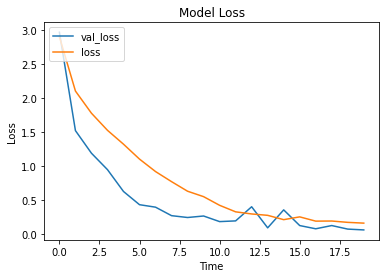

In [7]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel('Time')
plt.legend(['val_loss', 'loss'], loc='upper left')
plt.show()

**grafik diatas menunjukkan hasil dari loss terhadap waktu**

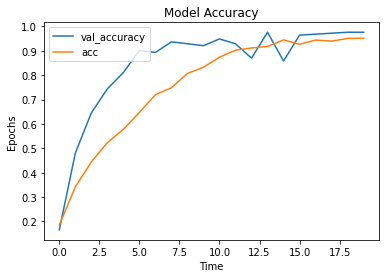

In [8]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Epochs")
plt.xlabel('Time')
plt.legend(['val_accuracy', 'acc'], loc='upper left')
plt.show()

**grafik diatas menunjukkan hasil dari epoch terhadap waktu pada model akurasi**

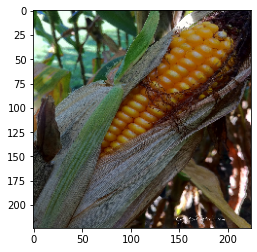

Actual: corn
Predicted: corn


In [9]:
from keras_preprocessing import image
image_path="C:/Users/asus/Documents/Downloads/deteksi sayuran/test/corn/Image_10.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])

**Dari hasil training yang sudah dilakukan, maka waktunya percobaan untuk melihat seberapa besar akurasi kita terhadap gambar**

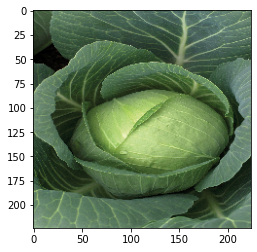

Actual: cabbage
Predicted: cabbage


In [10]:
from keras_preprocessing import image
image_path="C:/Users/asus/Documents/Downloads/deteksi sayuran/test/cabbage/Image_7.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])

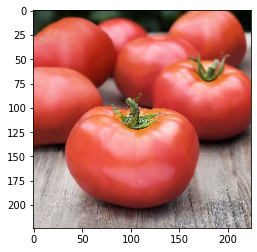

Actual: tomato
Predicted: tomato


In [11]:
from keras_preprocessing import image
image_path="C:/Users/asus/Documents/Downloads/deteksi sayuran/test/tomato/Image_2.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])